# Homework 3 Questions

Please answer each of the questions below in the space provided. Copy the noteook, and when you're done, submit as an ipynb file. This will be graded on correctness. Please comment your code to help the grader figure out what you're doing. If you do a hypothesis test, please report all relevant p-values in the text field.

Imports and data loading:

In [152]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import pprint
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data cleaning:

In [2]:
path = "./drive/MyDrive/cmsc320/HW3"

files = ['Dataset Generation (2024) (Responses) - Form Responses 1.csv',
        'Dataset Generation (Fardina) (Responses) - Form Responses 1.csv',
         'Dataset Generation (Max) (Responses) - Form Responses 1.csv']

names = ["2024 survey", "Fardina survey", "Max survey"]

df0 = pd.read_csv(path + "/" + files[0])
df1 = pd.read_csv(path + "/" + files[1])
df2 = pd.read_csv(path + "/" + files[2])

reorder = list(df1.columns)
reorder = reorder[:7] + reorder[8:] + [reorder[7]]
df1 = df1[reorder]

dfs = [df0, df1, df2]
for i,d in enumerate(dfs):
  r = len(d)
  c = len(d.columns)
  print("num rows x cols in %s: %d x %d"%(names[i], r, c))

num rows x cols in 2024 survey: 133 x 21
num rows x cols in Fardina survey: 144 x 22
num rows x cols in Max survey: 103 x 21


1. Create a graph telling a story about students political beliefs vs. their parents.

<ipython-input-150-d0b828556939>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  arr.set_xticklabels(pol_names)
<ipython-input-150-d0b828556939>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  arr.set_yticklabels(pol_names)


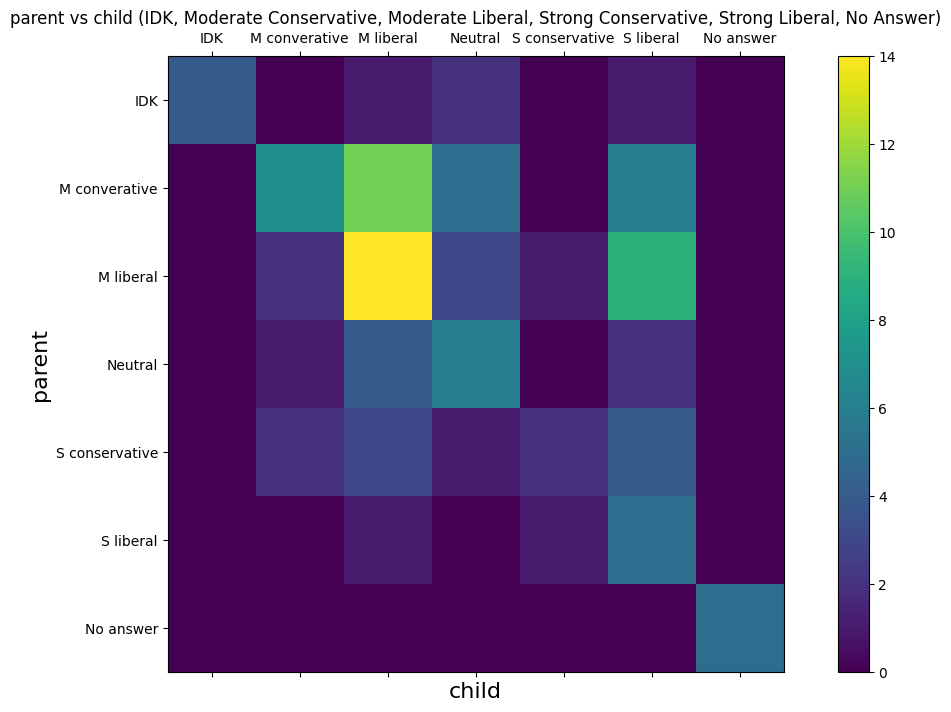

In [150]:
parent_index = df2.columns[3]
kid_index = df2.columns[4]
N = 4
politics = ["Don't know / It's complicated", 'Mildly conservative', 'Mildly liberal', \
            'Neutral', 'Strongly conservative', 'Strongly liberal']

matrix = np.zeros((7,7))
for i in range(7):
  df2_p = df2[df2[parent_index] == politics[i]] if i < 6 else df2[df2[parent_index].isnull()]
  for j in range(7):
    elem = df2_p[kid_index] == politics[j] if j < 6 else df2_p[kid_index].isnull()
    matrix[i,j] = np.sum(elem.apply(lambda x: 1 if x else 0))

pol_names = ["", "IDK", "M converative", "M liberal", "Neutral", "S conservative", "S liberal", "No answer"]
fig,arr = plt.subplots(figsize=(14,8))
p = arr.matshow(matrix)

plt.ylabel("parent", fontsize=16)
plt.xlabel("child", fontsize=16)
arr.set_xticklabels(pol_names)
arr.set_yticklabels(pol_names)
arr.set_title("parent vs child (IDK, Moderate Conservative, Moderate Liberal, Strong Conservative, Strong Liberal, No Answer)", fontsize=12)
fig.colorbar(p)
plt.show()

2. Show the percent of each answer for the political beliefs over all the respondants (so the percent of liberals, conservatives, etc).

..............
 only question 7-21 were scenario questions so I only looked at those

percentages:
Don't know / It's complicated :		4.135338%
Mildly conservative           :		12.030075%
Mildly liberal                :		34.736842%
Neutral                       :		16.616541%
Strongly conservative         :		4.210526%
Strongly liberal              :		28.270677%




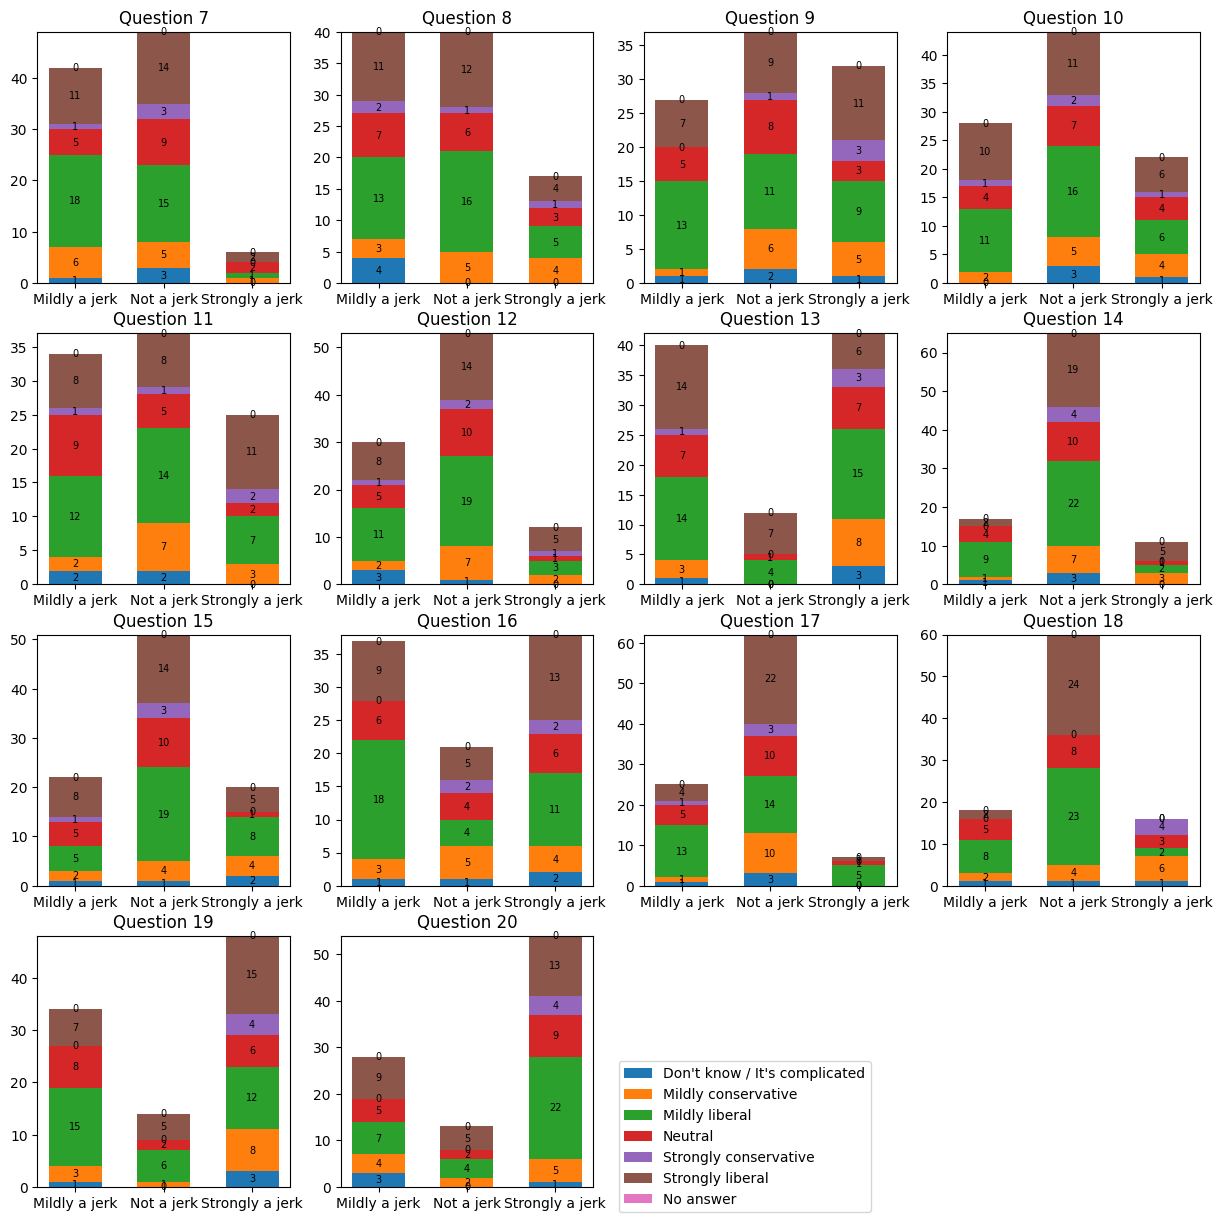

In [151]:
pol_index = 4
N = 7
N2 = 14
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
politics = ["Don't know / It's complicated", 'Mildly conservative', \
            'Mildly liberal', 'Neutral', 'Strongly conservative', 'Strongly liberal']

fig, ax = plt.subplots(4,4,figsize=(15,15))

pol_col = df2.columns[pol_index]
decode = lambda x: (x // 4, x - 4 *(x // 4))
ax[3][2].set_visible(False)
ax[3][3].set_visible(False)

totals = np.zeros(7)

# looking at question 7-21
for i in range(N, N+N2):
  print(".",end="")
  axle_i1, axle_i2 = decode(i-N)
  axle = ax[axle_i1][axle_i2]
  col = df2.columns[i]
  pol_sums = [[] for i in range(7)]

  # looking at each possible answer for the given question
  for a in answers:
    df2_i_a = df2[df2[col] == a][pol_col]
    nulls = df2_i_a.isnull()
    df2_i_a = df2_i_a[np.logical_not(nulls)]
    counter = 0

    # looking at the political breakdown of the given answer for the given question
    for k, p in enumerate(politics):
      num = np.sum(df2_i_a.apply(lambda x: 1 if x == p else 0))
      pol_sums[k].append(num)
      totals[k] += num
      counter += num
    null_num = len(df2_i_a) - counter
    pol_sums[-1].append(null_num)
    totals[-1] += null_num

  # plotting bar graph
  bottom = np.zeros(3)
  for k in range(7):
    lab = politics[k] if k < 6 else "No answer"
    p = axle.bar(answers, pol_sums[k], 0.6, label=lab, bottom=bottom)
    bottom += pol_sums[k]
    axle.bar_label(p, label_type='center', fontsize=7)

  axle.set_title('Question %d'%i)
  if (i == N+N2 - 1):
    axle.legend(loc=[1.1,-0.1])

print("\n only question 7-21 were scenario questions so I only looked at those")
print("\npercentages:")
for i,p in enumerate(politics):
  print("%-30s:\t\t%2f%%"%(p, (totals[i] / np.sum(totals)) * 100))
print()
print()
plt.show()

3. Does the priming question have a statistically significant effect on any questions? If so, which ones?

Your answer here:

In [143]:
print(np.unique(df1[np.logical_not(df1[df1.columns[-1]].isnull())][df1.columns[-1]]))

['No' 'Yes']


In [149]:
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
primes = ['No', 'Yes']
p_index = -1
p_col = df1.columns[p_index]


print("Test:\nNull:\t\tpriming and answer are independent\nAlternate:\tpriming and answer are NOT independent, reject Null if p-val < 0.06")
print("\nquestion\t|\tindependence test p-value\n------------------------------------------------------")

# independence test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://en.wikipedia.org/wiki/Contingency_table

for k in range(7,21):
  answer_index = k
  ans_col = df1.columns[answer_index]
  df1_fixed = df1[np.logical_not(np.logical_or(df1[p_col].isnull(), df1[ans_col].isnull()))]
  observations = np.zeros((len(primes), len(answers)))
  for j in range(len(answers)):
    n2 = df1_fixed[ans_col] == answers[j]
    for i in range(len(primes)):
      n1 = df1_fixed[p_col] == primes[i]
      observations[i, j] = np.sum([1 if x else 0 for x in np.logical_and(n1, n2)])
  test_stat, p_val, dof, expected_freq = scipy.stats.chi2_contingency(observations)
  print("%d\t\t|\t%f"%(k,p_val))

print("\nAs a result of the above tests, we can say that priming has a statistically significant effect on question 12, 14, and 16")
print("\nquestion 12:\n%s\n\nquestion 14:\n%s\n\nquestion 16:\n%s\n"%(df1.columns[12], df1.columns[14], df1.columns[16]))

Test:
Null:		priming and answer are independent
Alternate:	priming and answer are NOT independent, reject Null if p-val < 0.06

question	|	independence test p-value
------------------------------------------------------
7		|	0.515876
8		|	0.803992
9		|	0.736233
10		|	0.085432
11		|	0.151299
12		|	0.059514
13		|	0.548583
14		|	0.053932
15		|	0.079217
16		|	0.004677
17		|	0.529112
18		|	0.804132
19		|	0.161172
20		|	0.553381

As a result of the above tests, we can say that priming has a statistically significant effect on question 12, 14, and 16

question 12:
My sister's nine year old daughter is poorly behaved. One day, my sister dropped the daughter off on my doorstep without my consent and drove off, texting me that she needed me to watch her daughter for the day. The daughter complained of being hungry, so I gave her the leftovers I had. She said she didn't like them, but I told her that's all there was. She put them in the microwave until they burned, then told me she couldn't eat t

4. Does swapping genders have a stastically significant effect on any questions? If so, which ones?

Your answer here:

In [100]:
# Code for answer
genders = [['Famale', 'Female'], ['Male'], ['Non-binary / other'], ['Prefer not to say']]
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
gen_index = 6
gen_col = df2.columns[gen_index]


print("Test:\nNull:\t\t gender and answer are independent\nAlternate:\t gender and answer are NOT independent, reject Null if p-val < 0.06")
print("\nquestion\t|\tindependence test p-value\n------------------------------------------------------")

# independence test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://en.wikipedia.org/wiki/Contingency_table

for k in range(7,21):
  answer_index = k
  ans_col = df2.columns[answer_index]
  df2_fixed = df2[np.logical_not(df2[ans_col].isnull())]
  observations = np.zeros((len(genders), len(answers)))
  for j in range(len(answers)):
    n2 = df2_fixed[ans_col] == answers[j]
    for i in range(len(genders)):
      n1 = df2_fixed[np.logical_not(df2_fixed[gen_col].isnull())][gen_col].apply(lambda x: x in genders[i])
      if i == len(genders) - 1:
        n11 = df2_fixed[gen_col].isnull()
        n1 = np.logical_or(n1, n11)
      observations[i, j] = np.sum([1 if x else 0 for x in np.logical_and(n1, n2)])

  test_stat, p_val, dof, expected_freq = scipy.stats.chi2_contingency(observations)
  print("%d\t\t|\t%f"%(k,p_val))

print("\nAs a result of the above tests, we can say that swapping genders has a statistically significant effect on question 8 and question 16")
print("\nquestion 8:\n%s\n\nquestion 16:\n%s\n"%(df2.columns[8], df2.columns[16]))


Test:
Null:		 gender and answer are independent
Alternate:	 gender and answer are NOT independent, reject Null if p-val < 0.06

question	|	independence test p-value
------------------------------------------------------
7		|	0.570910
8		|	0.052583
9		|	0.360690
10		|	0.573628
11		|	0.203469
12		|	0.129991
13		|	0.348700
14		|	0.489836
15		|	0.690289
16		|	0.020602
17		|	0.910646
18		|	0.394492
19		|	0.297680
20		|	0.987360

As a result of the above tests, we can say that swapping genders has a statistically significant effect on question 8 and question 16

question 8:
My daughter is getting married soon. I only learned about her a few years ago. We've been building a relationship the last few years though and I am lucky to have her in my life now. Recently, she asked me to walk her down the aisle and while I am honored I told her no. Her step-dad practically raised her from a baby and I think that he deserves it far more than me. She was really upset and hurt when I said no. Am I a jer

5. What hour of the day were most of the surveys completed?

Your answer here:

In [ ]:
counter = np.zeros(24).astype(int)
for elem in df2[df2.columns[0]]:
  n = elem.find(":")
  counter[int(elem[n-2:n])] += 1

maximum = counter.argmax()
print("most surveys were completed during the %dth hour of the day"%maximum)

most surveys were completed during the 18th hour of the day


6. Which two questions in this semester's data have the most correlated answer?

Your answer:

In [ ]:
def get_encoded_col(N, df2=df2):
  col = df2.columns[N]
  comp = lambda x: 1 if x[0] else 2 if x[1] else 3 if x[2] else 0
  dums = pd.get_dummies(df2[col])
  dcols = dums.columns
  return np.array([comp(x) for x in zip(dums[dcols[0]], dums[dcols[1]], dums[dcols[2]])])

N=7
corrs = []
print("correlation corefficients:\n------------------")
max_i = (0,0)
max_corr = 0
for i in range(N,N+14):
  arr1 = get_encoded_col(i)
  for j in range(i+1, N+14):
    arr2 = get_encoded_col(j)
    c = np.corrcoef(np.stack((arr1, arr2)))[0,1]
    if c > max_corr:
      max_i = (i,j)
      max_corr = c
    corrs.append(c)

print("max correlation coefficient: question %d and question %d with a correlation of %f"%(max_i[0], max_i[1], max_corr))
print()
count = 0
for i in range(N,N+14):
  for j in range(i+1, N+14):
    print("question %2d x qustion %2d: %f"%(i, j, corrs[count]))
    count += 1

correlation corefficients:
------------------
max correlation coefficient: question 12 and question 14 with a correlation of 0.570300

question  7 x qustion  8: 0.011770
question  7 x qustion  9: 0.318068
question  7 x qustion 10: 0.313675
question  7 x qustion 11: 0.302495
question  7 x qustion 12: 0.361089
question  7 x qustion 13: 0.178872
question  7 x qustion 14: 0.378191
question  7 x qustion 15: 0.383398
question  7 x qustion 16: 0.351656
question  7 x qustion 17: 0.347478
question  7 x qustion 18: 0.238804
question  7 x qustion 19: 0.243612
question  7 x qustion 20: 0.382655
question  8 x qustion  9: 0.193577
question  8 x qustion 10: 0.293046
question  8 x qustion 11: 0.374716
question  8 x qustion 12: 0.386340
question  8 x qustion 13: 0.274919
question  8 x qustion 14: 0.340168
question  8 x qustion 15: 0.226084
question  8 x qustion 16: 0.186185
question  8 x qustion 17: 0.319416
question  8 x qustion 18: 0.476423
question  8 x qustion 19: 0.309676
question  8 x qustion 20:

7. Which two questions this semseter had the highest covariance?

Your answer:

In [ ]:
# this encodes each entry of a question to:
  # 0 - null
  # 1 - 'mildly a jerk'
  # 2 - 'not a jerk'
  # 3 - 'strongly a jerk'
def get_encoded_col(N, df2=df2):
  col = df2.columns[N]
  comp = lambda x: 1 if x[0] else 2 if x[1] else 3 if x[2] else 0
  dums = pd.get_dummies(df2[col])
  dcols = dums.columns
  return np.array([comp(x) for x in zip(dums[dcols[0]], dums[dcols[1]], dums[dcols[2]])])

N=7
covs = []
print("covariances:\n------------------")
max_i = (0,0)
max_cov = 0
for i in range(N,N+14):
  arr1 = get_encoded_col(i)
  for j in range(i+1, N+14):
    arr2 = get_encoded_col(j)
    c = np.cov(np.stack((arr1, arr2)))[0,1]
    if c > max_cov:
      max_i = (i,j)
      max_cov = c
    covs.append(c)

print("max covariance: question %d and question %d with a covariance of %f"%(max_i[0], max_i[1], max_cov))
print()
count = 0
for i in range(N,N+14):
  for j in range(i+1, N+14):
    print("question %2d x qustion %2d: %f"%(i, j, covs[count]))
    count += 1

covariances:
------------------
max covariance: question 13 and question 15 with a covariance of 0.446887

question  7 x qustion  8: 0.006758
question  7 x qustion  9: 0.203979
question  7 x qustion 10: 0.194270
question  7 x qustion 11: 0.189035
question  7 x qustion 12: 0.197601
question  7 x qustion 13: 0.132781
question  7 x qustion 14: 0.204740
question  7 x qustion 15: 0.232819
question  7 x qustion 16: 0.244527
question  7 x qustion 17: 0.178660
question  7 x qustion 18: 0.134114
question  7 x qustion 19: 0.176471
question  7 x qustion 20: 0.280982
question  8 x qustion  9: 0.146488
question  8 x qustion 10: 0.214163
question  8 x qustion 11: 0.276318
question  8 x qustion 12: 0.249476
question  8 x qustion 13: 0.240815
question  8 x qustion 14: 0.217304
question  8 x qustion 15: 0.162003
question  8 x qustion 16: 0.152770
question  8 x qustion 17: 0.193794
question  8 x qustion 18: 0.315724
question  8 x qustion 19: 0.264706
question  8 x qustion 20: 0.258804
question  9 x qust

8. Which question this semseter was most strongly influenced by respondants religious views?

Your answer:

In [101]:
religion = ['Not spiritual at all', 'Somewhat spiritual', 'Strongly spiritual']
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
rel_index = 5
rel_col = df2.columns[rel_index]


print("Test:\nNull:\t\t religious view and answer are independent\nAlternate:\t religious view and answer are NOT independent, reject Null if p-val < 0.06")
print("(The question with the lowest p-value will be the answer most strongly influeced by religious view)")
print("\nquestion\t|\tindependence test p-value\n------------------------------------------------------")

# independence test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://en.wikipedia.org/wiki/Contingency_table

for k in range(7,21):
  answer_index = k
  ans_col = df2.columns[answer_index]
  observations = np.zeros((len(religion)+1, len(answers)))
  df2_fixed = df2[np.logical_not(df2[ans_col].isnull())]
  for j in range(len(answers)):
    n2 = df2_fixed[ans_col].apply(lambda x: 1 if x == answers[j] else 0)
    for i in range(len(religion) + 1):
      n1 = df2_fixed[rel_col].isnull()
      if i < len(religion):
        n1 = df2_fixed[np.logical_not(n1)][rel_col] == religion[i]
      observations[i, j] = np.sum([1 if x else 0 for x in np.logical_and(n1, n2)])
  if (np.sum(observations[-1, :]) == 0):
    observations = observations[:-1,:]

  test_stat, p_val, dof, expected_freq = scipy.stats.chi2_contingency(observations)
  print("%d\t\t|\t%f"%(k,p_val))

print("\nAs a result of the above tests, question 18 was most affected by religious views")
print("\nquestion 18:%s\n"%df2.columns[18])

Test:
Null:		 religious view and answer are independent
Alternate:	 religious view and answer are NOT independent, reject Null if p-val < 0.06
(The question with the lowest p-value will be the answer most strongly influeced by religious view)

question	|	independence test p-value
------------------------------------------------------
7		|	0.350313
8		|	0.694241
9		|	0.669519
10		|	0.919238
11		|	0.524187
12		|	0.235153
13		|	0.028250
14		|	0.242625
15		|	0.644095
16		|	0.162287
17		|	0.058895
18		|	0.000940
19		|	0.011832
20		|	0.596859

As a result of the above tests, question 18 was most affected by religious views

question 18:
Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?



9. Are there any questions where graduate students had a stastically signifant difference from undergraduate students? If so, which ones?

Your answer:

In [153]:
standing = [['Freshman', 'Junior', 'Senior', 'Sophmore'], ['Graduate Student']]
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
s_index = 1
s_col = df0.columns[s_index]


print("Test:\nNull:\t\t student standing and answer are independent\nAlternate:\t student standing and answer are NOT independent, reject Null if p-val < 0.06")
print("\nquestion\t|\tindependence test p-value\n------------------------------------------------------")

# independence test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://en.wikipedia.org/wiki/Contingency_table

for k in range(7,21):
  answer_index = k
  ans_col = df0.columns[answer_index]
  observations = np.zeros((len(standing), len(answers)))
  df0_fixed = df0[np.logical_not(np.logical_or(df0[ans_col].isnull(), df0[s_col].isnull()))]
  for j in range(len(answers)):
    n2 = df0_fixed[ans_col].apply(lambda x: 1 if x == answers[j] else 0)
    for i in range(len(standing)):
      n1 = df0_fixed[s_col].apply(lambda x: x in standing[i])
      observations[i, j] = np.sum([1 if x else 0 for x in np.logical_and(n1, n2)])

  test_stat, p_val, dof, expected_freq = scipy.stats.chi2_contingency(observations)
  print("%d\t\t|\t%f"%(k,p_val))

print("\nAs a result of the above tests, student standing had a statistically significant effect on participant's answer for question 14")
print("\nquestion 14:\n%s\n"%df2.columns[14])

Test:
Null:		 student standing and answer are independent
Alternate:	 student standing and answer are NOT independent, reject Null if p-val < 0.06

question	|	independence test p-value
------------------------------------------------------
7		|	0.233911
8		|	0.596072
9		|	0.173239
10		|	0.789744
11		|	0.334826
12		|	0.755754
13		|	0.487727
14		|	0.009750
15		|	0.582650
16		|	0.785514
17		|	0.602834
18		|	0.770918
19		|	0.149943
20		|	0.953853

As a result of the above tests, student standing had a statistically significant effect on participant's answer for question 14

question 14:
I'm a single mom with four kids, one of whom has a different father from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the 

10. Bin the responses by morning, afternoon, evening and night. Do these catagories have a statistically significant effect on any questions? If so, which ones?

Your answer:

In [131]:
# This is how I've binned the different times of the day (in military time)
# night := 0 - 6
# morning := 6 - 12
# afternoon := 12 - 18
# evening := 18 - 24


def make_num(elem):
  n = elem.find(":")
  return int(elem[n-2:n])
daytime = [0,1,2,3]
answers = ['Mildly a jerk', 'Not a jerk', 'Strongly a jerk']
time_index = 0
time_col = df2.columns[time_index]
binner = lambda x: 0 if (x >= 0 and x < 6) else 1 if (x >= 6 and x < 12) else 2 if (x >= 12 and x < 18) else 3

print("Test:\nNull:\t\ttimestamp and answer are independent\nAlternate:\ttimestamp and answer are NOT independent, reject Null if p-val < 0.06")
print("\nquestion\t|\tindependence test p-value\n------------------------------------------------------")

# independence test: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://en.wikipedia.org/wiki/Contingency_table

for k in range(7,21):
  answer_index = k
  ans_col = df2.columns[answer_index]
  observations = np.zeros((len(daytime), len(answers)))
  df2_fixed = df2[np.logical_not(df2[ans_col].isnull())]

  for j in range(len(answers)):
    n2 = df2_fixed[ans_col].apply(lambda x: 1 if x == answers[j] else 0)
    for i in range(len(daytime)):
      times = [make_num(x) for x in df2_fixed[time_col]]
      n1 = [binner(x) == daytime[i] for x in times]
      observations[i, j] = np.sum([1 if x else 0 for x in np.logical_and(n1, n2)])

  test_stat, p_val, dof, expected_freq = scipy.stats.chi2_contingency(observations)
  print("%d\t\t|\t%f"%(k,p_val))

print("\nAs a result of the above tests, timestamp had a statistically significant effect on participant's answer for question 11, 12, and 16")
print("\nquestion 11:\n%s\n"%df2.columns[11])
print("\nquestion 12: \n%s\n"%df2.columns[12])
print("\nquestion 16: \n%s\n"%df2.columns[16])

Test:
Null:		timestamp and answer are independent
Alternate:	timestamp and answer are NOT independent, reject Null if p-val < 0.06

question	|	independence test p-value
------------------------------------------------------
7		|	0.446265
8		|	0.285767
9		|	0.740804
10		|	0.770602
11		|	0.037047
12		|	0.013901
13		|	0.744448
14		|	0.118076
15		|	0.196066
16		|	0.026612
17		|	0.903418
18		|	0.722532
19		|	0.468965
20		|	0.652691

As a result of the above tests, timestamp had a statistically significant effect on participant's answer for question 11, 12, and 16

question 11:
I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?


question 12: 
My sister's nine year old daughter is poorly behaved. One day, my si